<a href="https://colab.research.google.com/github/eduardorebelove/Perceptron/blob/main/PerceptronBruto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

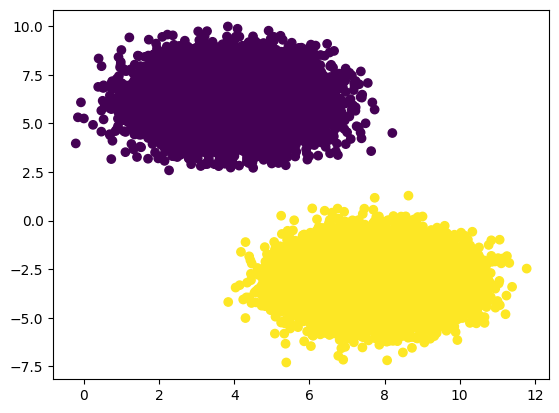

In [253]:
blobs = make_blobs(n_samples=50000, n_features=2, centers=2)

X = blobs[0]
C = blobs[1]
plt.scatter(X[:,0], X[:,1] ,c=C)
plt.show()
arquivo = open('arq_treinamento.csv','w')
arquivo2 = open('arq_valida.csv','w')

i = 0
for x in blobs[0]:
    if ((i % 2) == 0):
        if (C[i] > 0):
            arquivo.write(str(x[0])+","+str(x[1])+","+str(C[i])+"\n")
        else:
            arquivo.write(str(x[0]) + "," + str(x[1]) + ",-1\n")
    else:
        arquivo2.write(str(x[0])+","+str(x[1])+"\n")

    i += 1
arquivo.close()
arquivo2.close()

In [254]:
# Classe Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.iterations = 0  # Atributo para rastrear as iterações

# Dimenção e inicialização
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)

        # Iteração sobre número de épocas
        for _ in range(self.n_iters):
            self.iterations += 1
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Atualização de pesos
                if y_[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]
                    errors += 1

            # Se não houver erros, a separação foi bem-sucedida
            if errors == 0:
                return

        # Exceção
        raise ValueError("O perceptron não conseguiu diferenciar os objetos dentro do número máximo de iterações.")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        return y_predicted

    def save_model(self, file_path_weights, file_path_bias):
        np.savetxt(file_path_weights, self.weights, delimiter=",")
        with open(file_path_bias, 'w') as f:
            f.write(str(self.bias))

# Função para plotar a fronteira de decisão
    def plot_decision_boundary(X, y, model):
        x1 = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
        x2 = -(model.weights[0] * x1 + model.bias) / model.weights[1]

        plt.plot(x1, x2, '-r')
        plt.ylim(min(X[:, 1]), max(X[:, 1]))
        plt.scatter(X[:, 0], X[:, 1], c=y,)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perceptron Decision Boundary')
        plt.show()

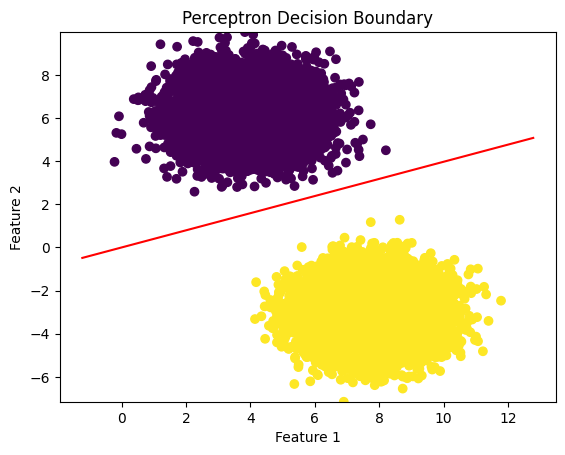

O perceptron foi treinado por 2 iterações.


In [255]:
if __name__ == "__main__":
    # Filtrar apenas os dados de treinamento
    X_train = []
    y_train = []
    with open('arq_treinamento.csv') as f:
        for line in f:
            parts = line.strip().split(',')
            X_train.append([float(parts[0]), float(parts[1])])
            y_train.append(int(parts[2]))
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Inicializar o perceptron
    perceptron = Perceptron(learning_rate=0.01, n_iters=100)

    try:
        # Treinar o perceptron
        perceptron.fit(X_train, y_train)

        # Salvar os pesos e o bias
        perceptron.save_model("weights.txt", "bias.txt")

        # Plotar a fronteira de decisão
        plot_decision_boundary(X_train, y_train, perceptron)

        # Exibir o número de iterações até a separação correta
        print(f"O perceptron foi treinado por {perceptron.iterations} iterações.")

    except ValueError as e:
        # Caso o perceptron não consiga diferenciar os objetos
        print(e)